# Linear Regression

The workhorse of empirical research in the social sciences

In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import pyrsm as rsm

# increase plot resolution
mpl.rcParams["figure.dpi"] = 150


In [ ]:
## setup pyrsm for autoreload when you edit code and save
## nothing else needed!
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

### Example 1: Catalog sales

We have access to data from a company selling men's and women's apparel through mail-order catalogs (dataset `catalog`). The company maintains a database on past and current customers' value and characteristics. Value is determined as the total \$ sales to the customer in the last year.

The catalog company is interested in redesigning their Customer Relationship Management (CRM) strategy. We will proceed in two steps:

1. Estimate a regression model using last year's sales total. Response variable: sales total for each of the 200 households; Explanatory variables: household income (measured in thousands of dollars), size of household, and age of the household head.
2. Interpret each of the estimated coefficients. Also provide a statistical evaluation of the model as a whole.

In [3]:
rsm.load_data(pkg="model", name="catalog", dct=globals())

In [4]:
rsm.describe(catalog)

## Catalog sales

### Description

Data from a company selling men's and women's apparel through mail-order catalogs. The company maintains a database on past and current customers' value and characteristics. Value is determine as the total $ sales to the customer in the last year. The data are a random sample of 200 customers from the company's database.

### Variables

A data frame with 200 observations on 4 variables

- id = Customer id
- Sales =	Total sales (in $) to a household in the past year
- Income = Household income ($1000) 
- HH.size = Size of the household (# of people) 
- Age = Age of the head of the household

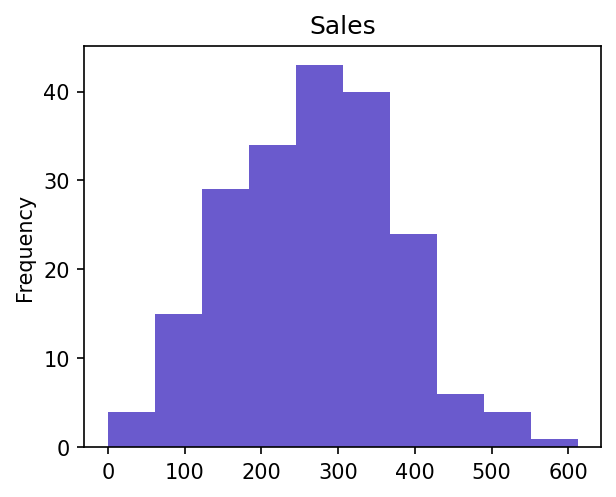

In [5]:
rsm.distr_plot(catalog[["Sales"]])

In [6]:
evars = ["Income", "HH_size", "Age"]
rvar = "Sales"

In [7]:
fitted = rsm.regress(catalog, rvar=rvar, evars=evars, ssq=True)

Data:  catalog
Response variable    : Sales
Explanatory variables: Income, HH_size, Age
Null hyp.: the effect of x on Sales is zero
Alt. hyp.: the effect of x on Sales is not zero

                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     32.33
Date:                Tue, 02 May 2023   Prob (F-statistic):           5.08e-17
Time:                        00:14:21   Log-Likelihood:                -1179.8
No. Observations:                 200   AIC:                             2368.
Df Residuals:                     196   BIC:                             2381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std

In [8]:
fitted = rsm.regress(catalog, form="Sales ~ Income + HH_size + Age")


Data:  catalog
Response variable    : Sales
Explanatory variables: Age, HH_size, Income, Intercept
Null hyp.: the effect of x on Sales is zero
Alt. hyp.: the effect of x on Sales is not zero

                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     32.33
Date:                Tue, 02 May 2023   Prob (F-statistic):           5.08e-17
Time:                        00:14:21   Log-Likelihood:                -1179.8
No. Observations:                 200   AIC:                             2368.
Df Residuals:                     196   BIC:                             2381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 

Probability calculator
Distribution: F
Df 1:	3
Df 2:	196
Mean:	1.01
Variance:	0.698
Lower bound:	0
Upper bound:	0.975

P(X < 3.183) = 0.975
P(X > 3.183) = 0.025


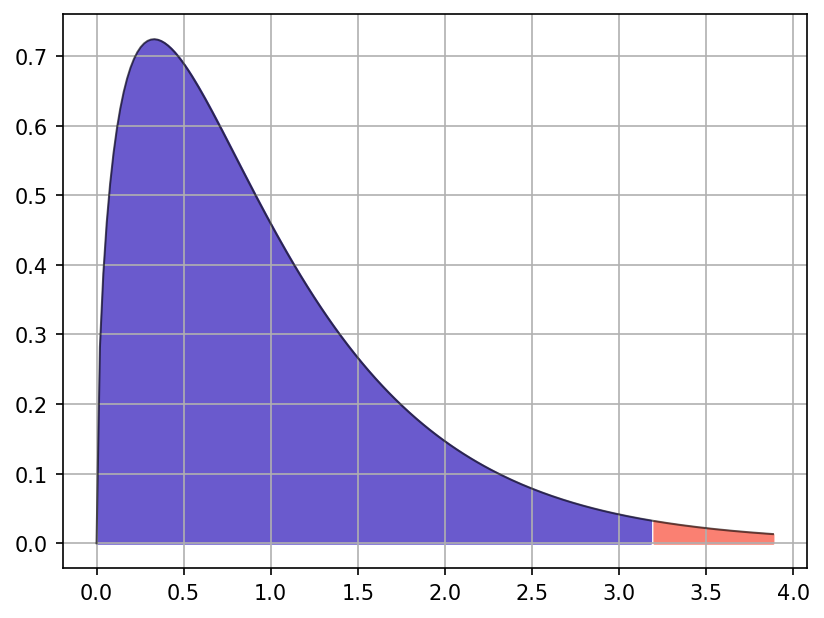

In [9]:
params = dict(zip(["dfn", "dfd", "lb", "ub", "decimals"], [3, 196, 0, 0.975, 3]))
pcf = rsm.prob_calc("F", params)
pcf.summary()
pcf.plot()

Probability calculator
Distribution: t
Df:	196
Mean:	0.0
St. dev:	1.005
Lower bound:	0.025
Upper bound:	0.975

P(X < -1.972) = 0.025
P(X > -1.972) = 0.975
P(X < 1.972) = 0.975
P(X > 1.972) = 0.025
P(-1.972 < X < 1.972) = 0.95
1 - P(-1.972 < X < 1.972 = 0.05


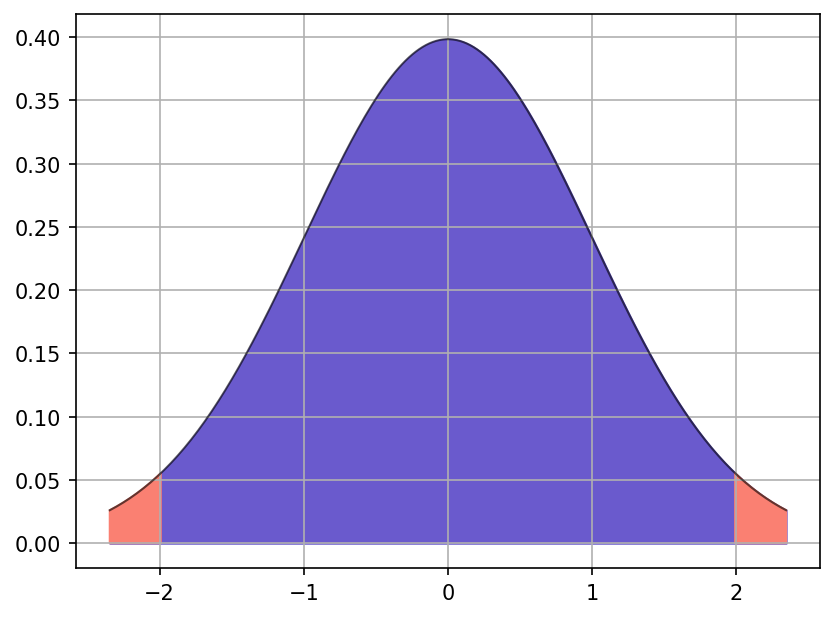

In [10]:
params = dict(zip(["df", "lb", "ub", "decimals"], [196, 0.025, 0.975, 3]))

pct = rsm.prob_calc("t", params)
pct.summary()
pct.plot()

### Example 2: Ideal data for regression

The data `ideal` contains simulated data that is very useful to demonstrate what data for, and residuals from, a regression should ideally look like. The data has 1,000 observations on 4 variables. `y` is the response variable and `x1`, `x2`, and `x3` are explanatory variables. The plots shown below can be used as a bench mark for regressions on real world data

In [11]:
rsm.load_data(pkg="model", name="ideal", dct=globals())

In [12]:
rsm.describe(ideal)

## 'Ideal' data for regression

### Description

Simulated data set used to illustrate evaluation of regression residuals.  

### Variables

A data frame with 1000 observations on 4 variables (y, x1, x2, and x3)

In [13]:
evars = ["x1", "x2", "x3"]
rvar = "y"

In [14]:
fitted = rsm.regress(ideal, evars=evars, rvar=rvar)

Data:  'ideal'
Response variable    : y
Explanatory variables: x1, x2, x3
Null hyp.: the effect of x on y is zero
Alt. hyp.: the effect of x on y is not zero

                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1361.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        00:14:22   Log-Likelihood:                -2100.2
No. Observations:                1000   AIC:                             4208.
Df Residuals:                     996   BIC:                             4228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

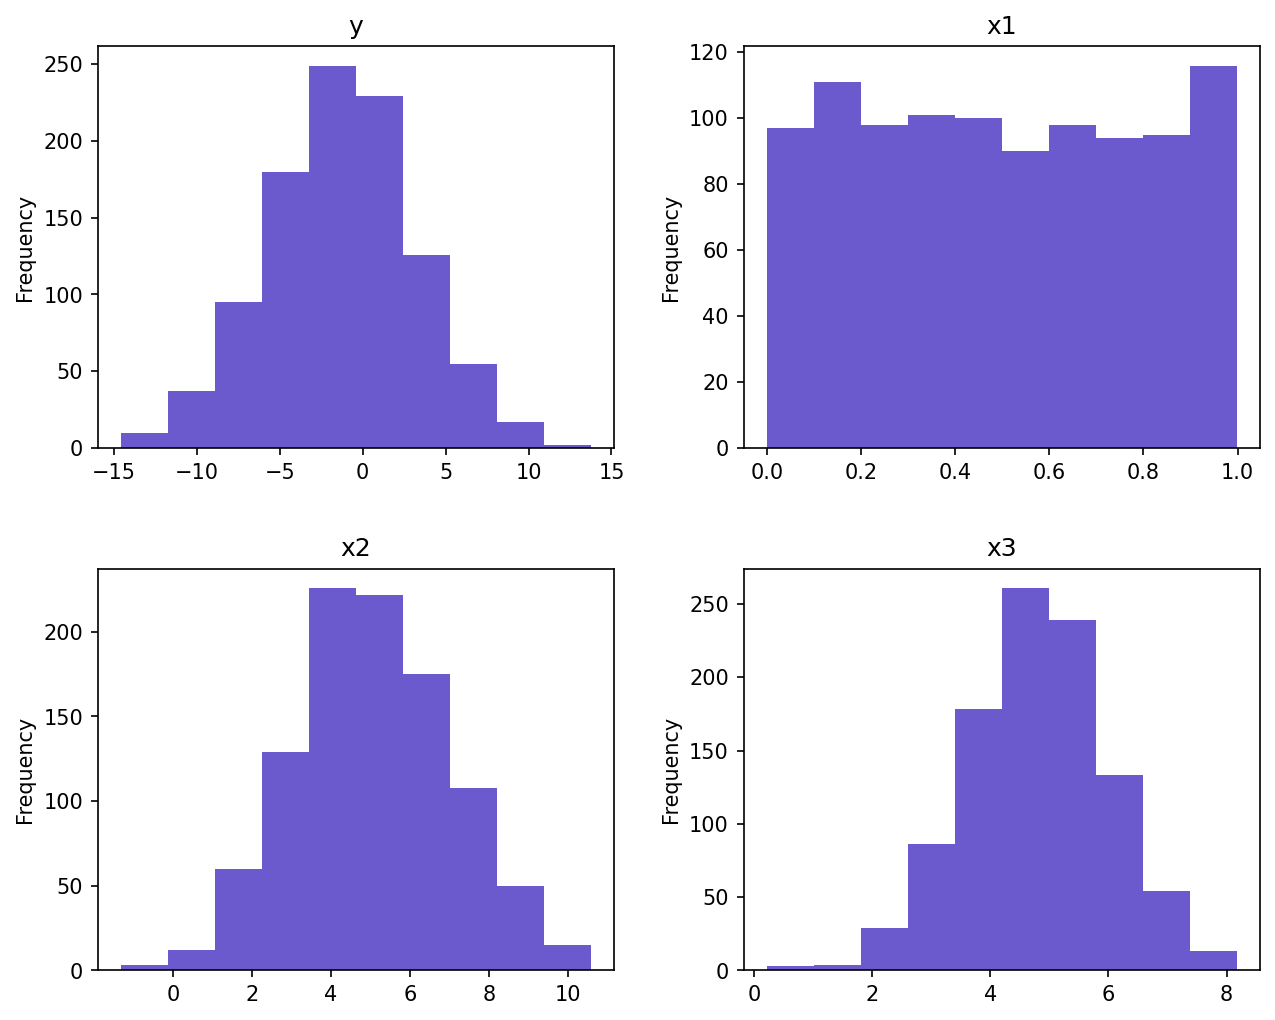

In [15]:
rsm.distr_plot(ideal)

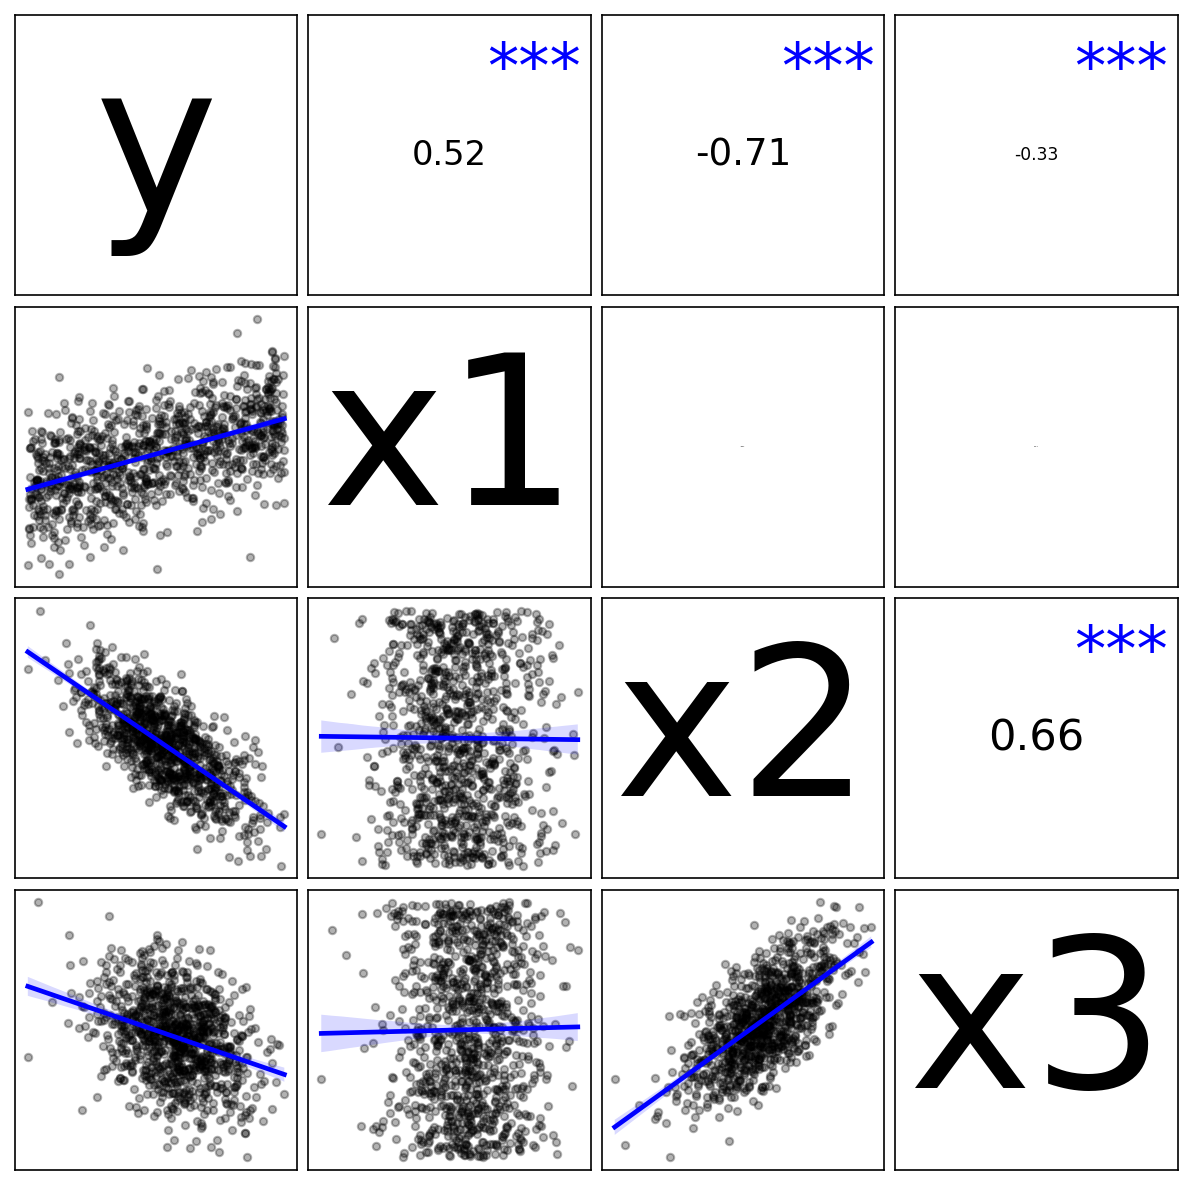

In [16]:
cr = rsm.correlation(ideal[["y", "x1", "x2", "x3"]])
cr.plot(nobs=-1, figsize=(10, 10))

exog_names: ['Intercept', 'x1', 'x2', 'x3']

exog_names: ['x1', 'x2', 'x3']


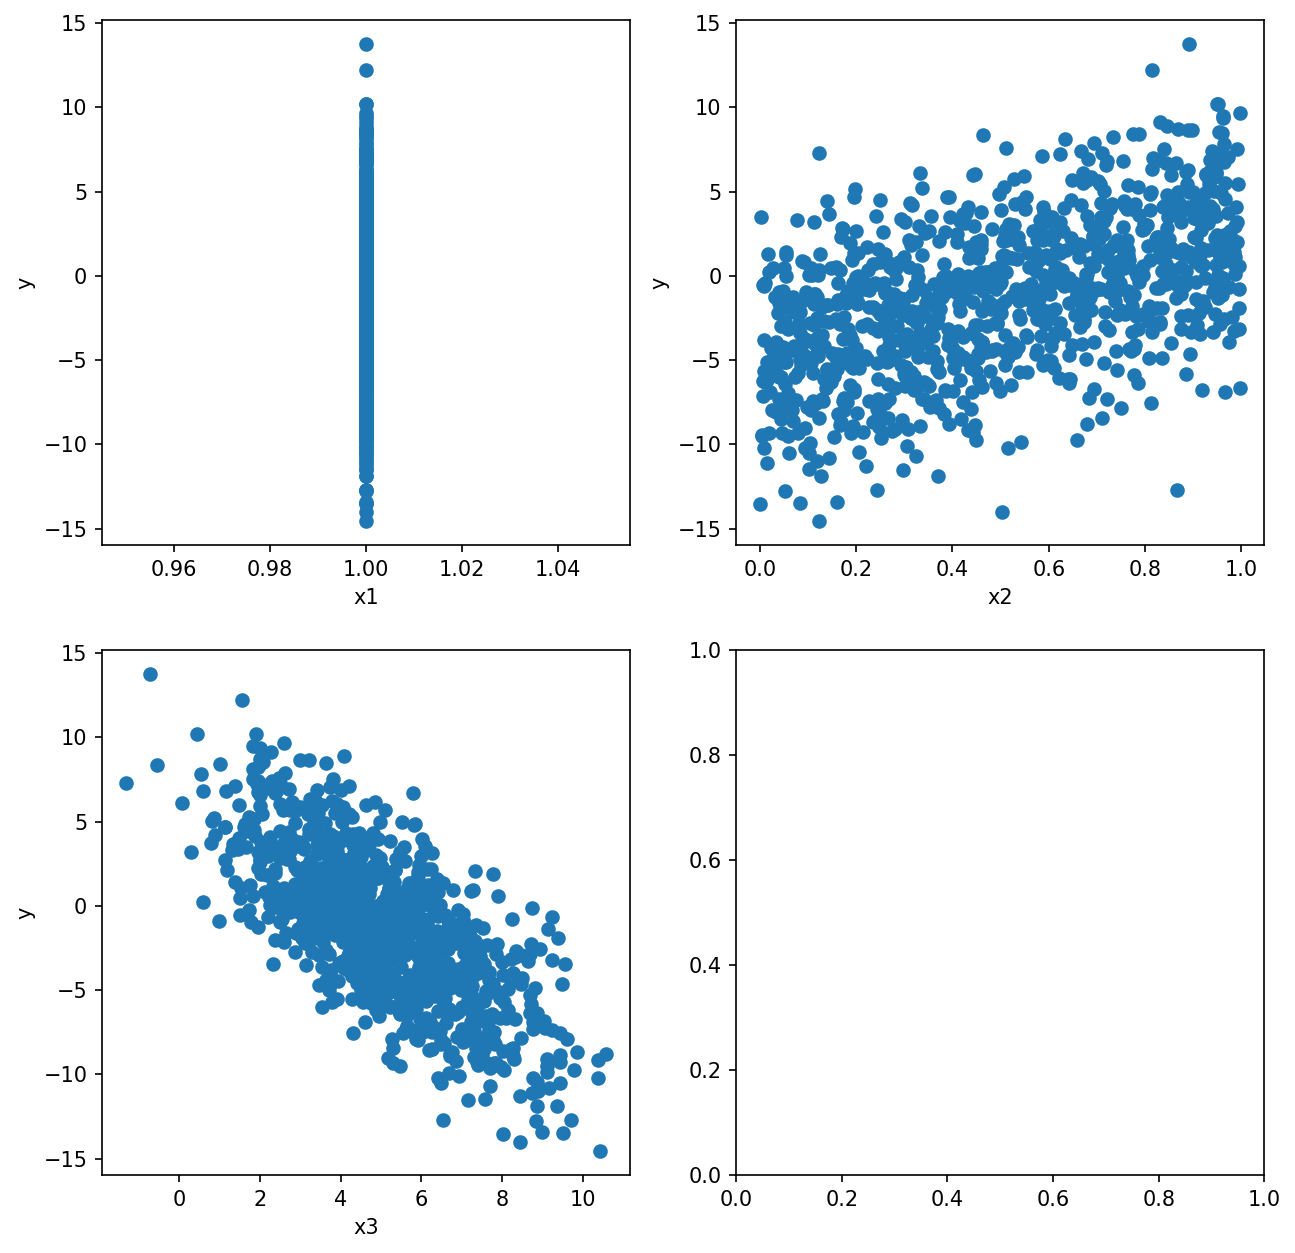

In [17]:
# not working yet
rsm.scatter_plot(fitted)

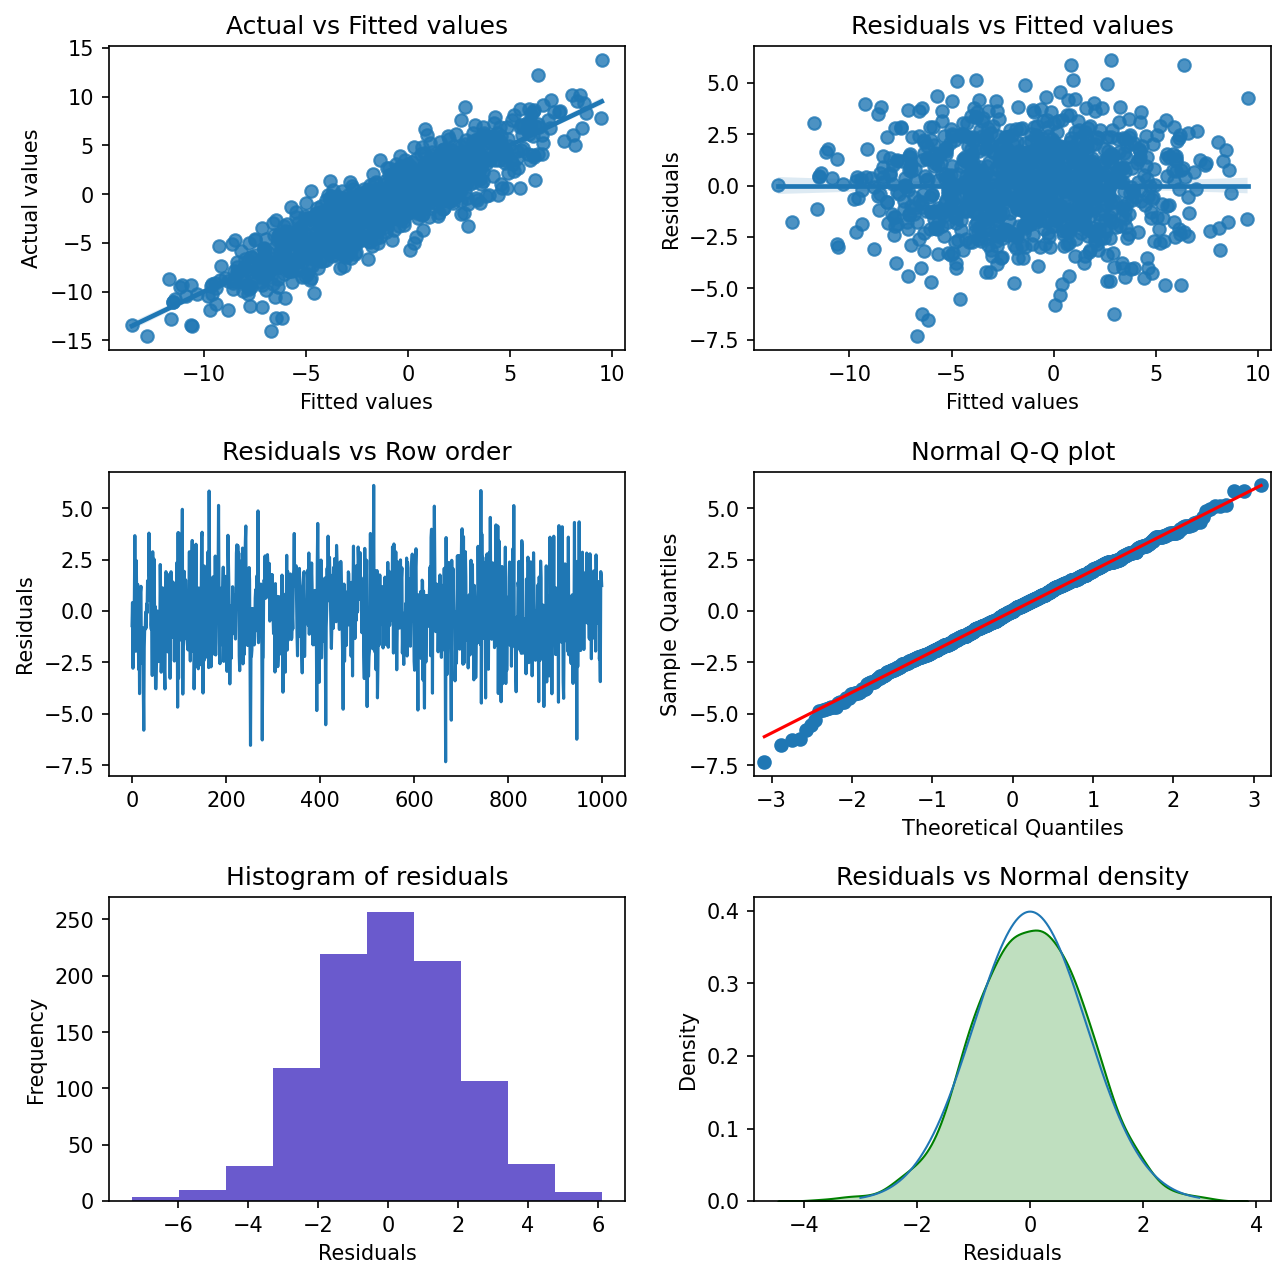

In [18]:
# qqplot and formula interface? 
# the formula interface is important because it makes undummify unnecessary
rsm.reg_dashboard(fitted=fitted, nobs=-1)

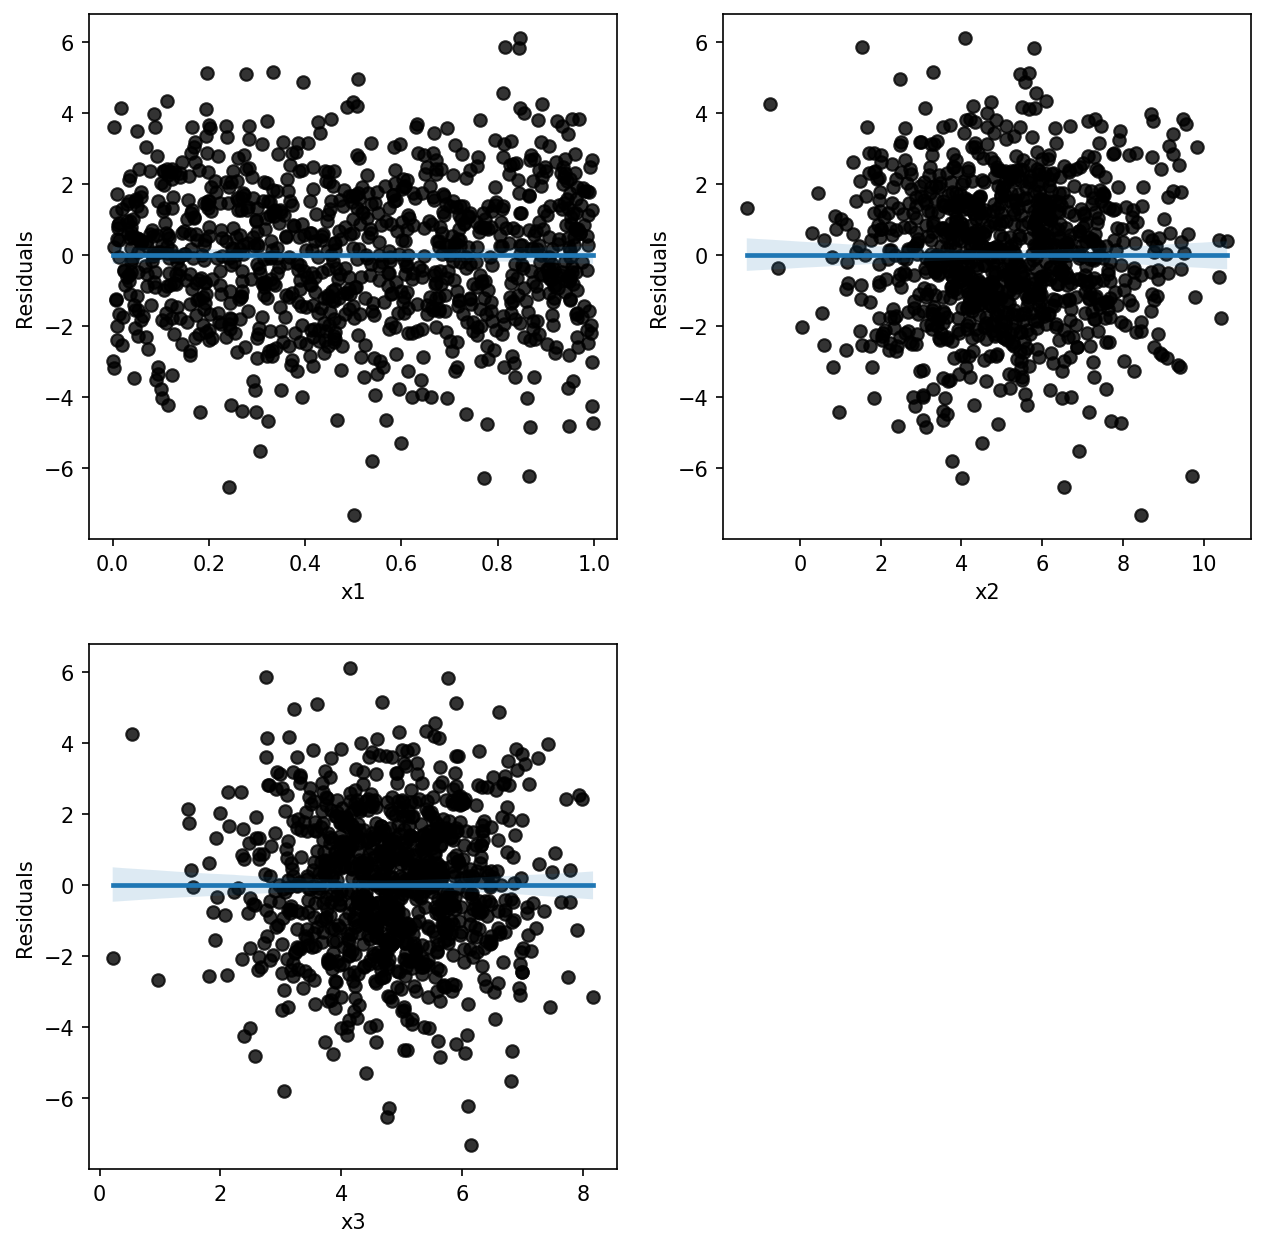

In [19]:
# not working yet
rsm.residual_vs_explanatory_plot(fitted)

exog_names: ['Intercept', 'x1', 'x2', 'x3']

exog_names: ['x1', 'x2', 'x3']


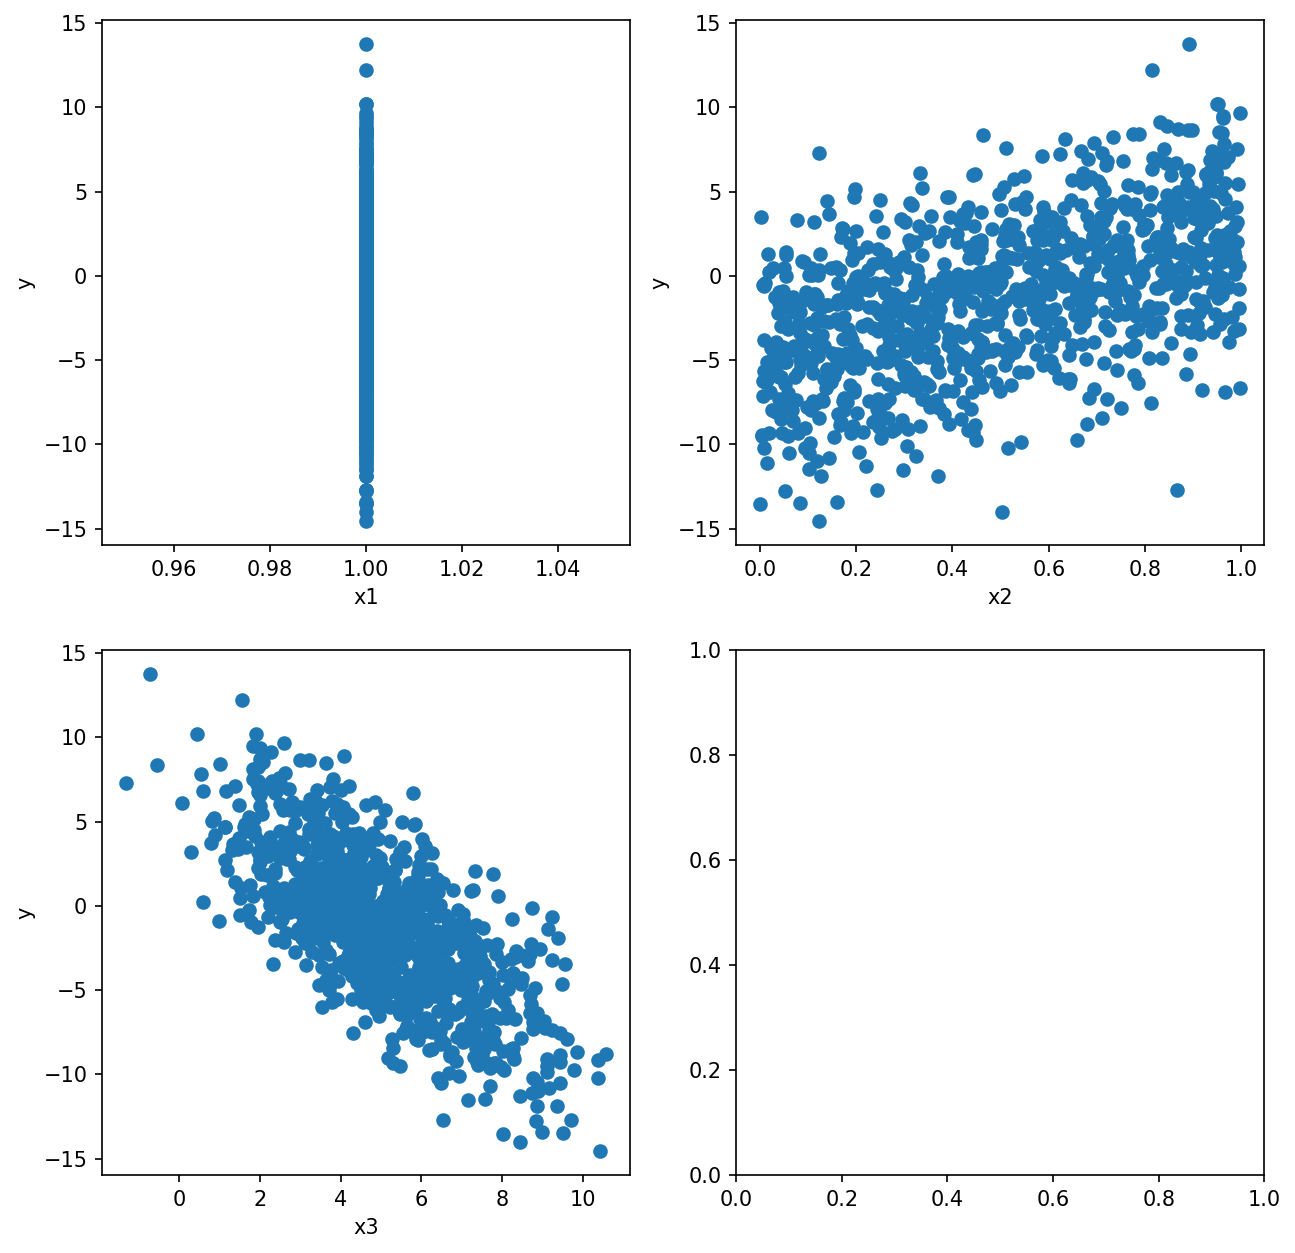

In [20]:
# not working yet
rsm.scatter_plot(fitted)

### Example 3: Linear or log-log regression?

Both linear and log-log regressions are commonly applied to business data. In this example we will look for evidence in the data and residuals that may suggest which model specification is  appropriate for the available data.

In [21]:
rsm.load_data(pkg="data", name="diamonds", dct=globals())

In [22]:
rsm.describe(diamonds)

## Diamond prices

Prices of 3,000 round cut diamonds

### Description

A dataset containing the prices and other attributes of a sample of 3000 diamonds. The variables are as follows:

### Variables

- price = price in US dollars ($338--$18,791)
- carat = weight of the diamond (0.2--3.00)
- clarity = a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- cut = quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color = diamond color, from J (worst) to D (best)
- depth = total depth percentage = z / mean(x, y) = 2 * z / (x + y) (54.2--70.80)
- table = width of top of diamond relative to widest point (50--69)
- x = length in mm (3.73--9.42)
- y = width in mm (3.71--9.29)
- z = depth in mm (2.33--5.58)
- date = shipment date

### Additional information

<a href="http://www.diamondse.info/diamonds-clarity.asp" target="_blank">Diamond search engine</a>


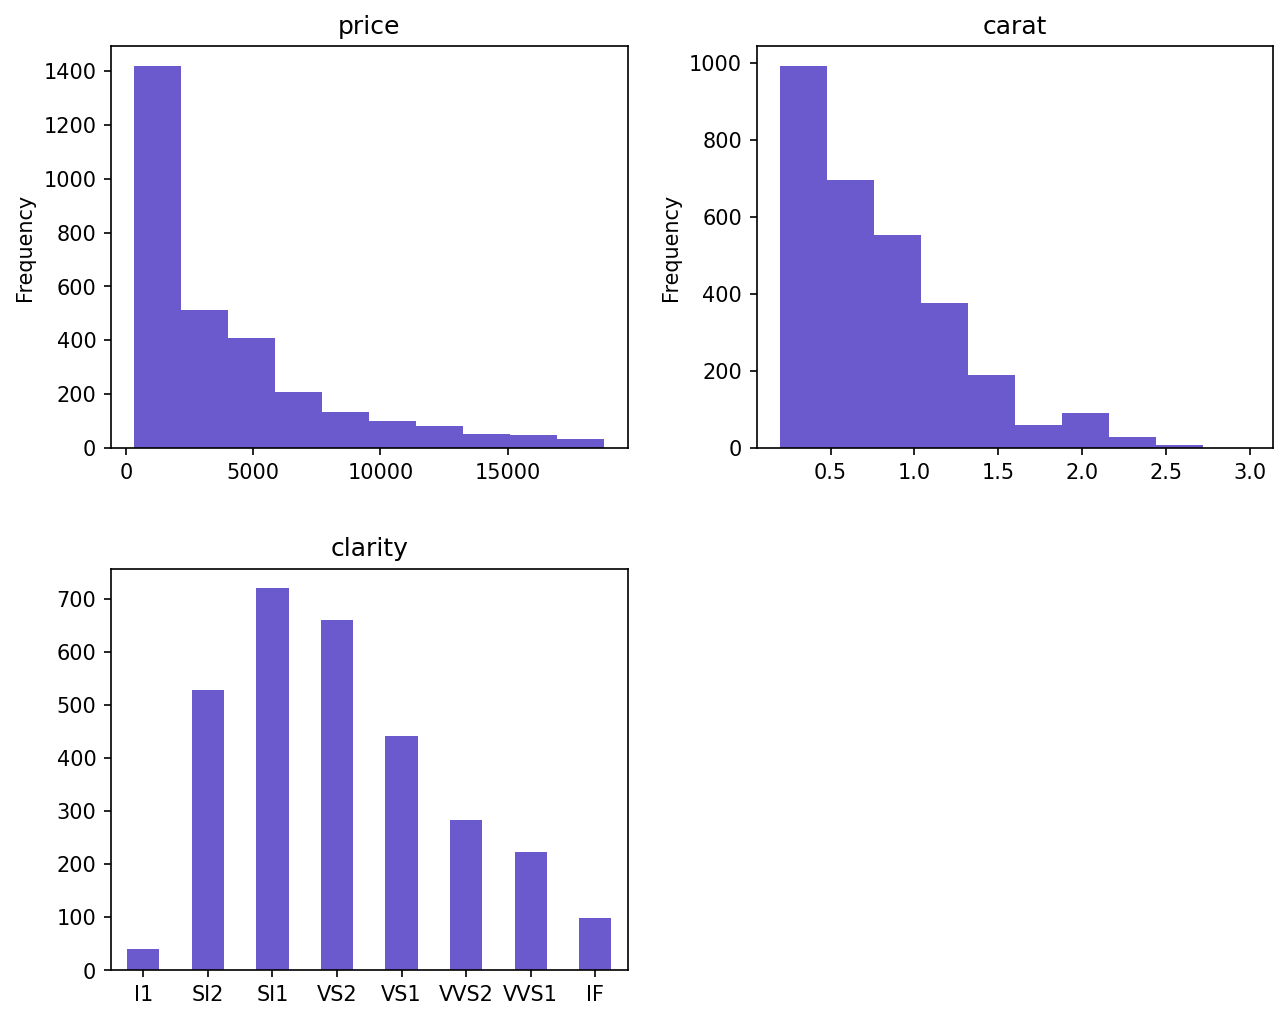

In [23]:
rsm.distr_plot(diamonds, cols=["price", "carat", "clarity"])

In [24]:
diamonds.columns

Index(['price', 'carat', 'clarity', 'cut', 'color', 'depth', 'table', 'x', 'y',
       'z', 'date'],
      dtype='object')

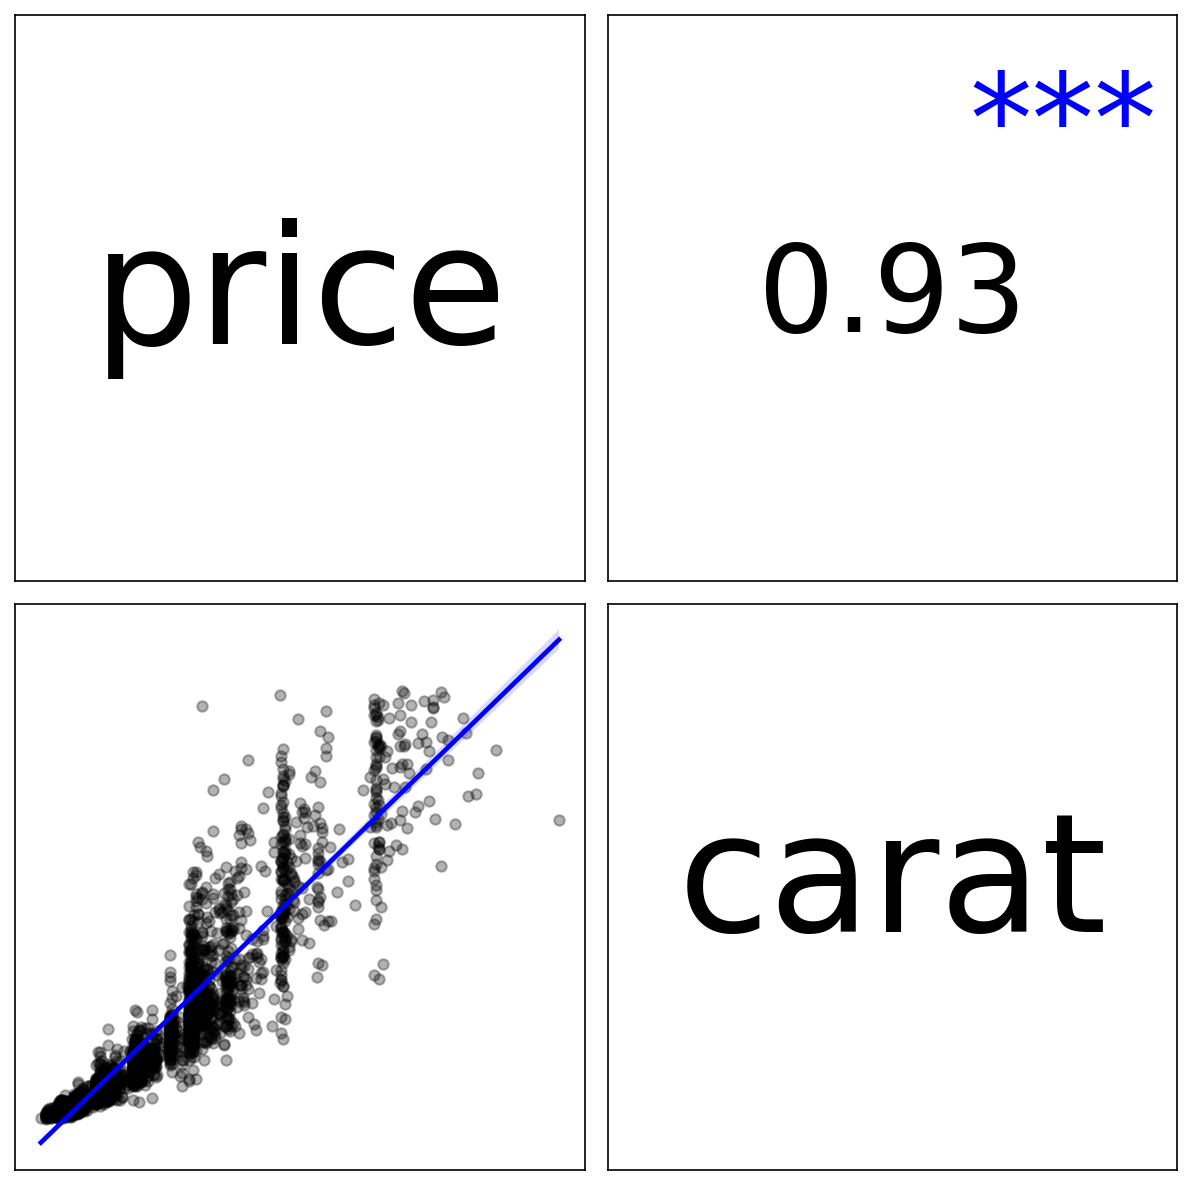

In [25]:
cr = rsm.correlation(diamonds[["price", "carat", "clarity"]])
cr.plot(nobs=-1, figsize=(10, 10))

In [26]:
fitted = rsm.regress(diamonds, rvar="price", evars=["carat", "clarity"])

Data:  diamond
Response variable    : price
Explanatory variables: carat, clarity
Null hyp.: the effect of x on price is zero
Alt. hyp.: the effect of x on price is not zero

                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     3530.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        00:14:25   Log-Likelihood:                -25587.
No. Observations:                3000   AIC:                         5.119e+04
Df Residuals:                    2991   BIC:                         5.125e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std 

exog_names: ['Intercept', 'clarity[T.SI2]', 'clarity[T.SI1]', 'clarity[T.VS2]', 'clarity[T.VS1]', 'clarity[T.VVS2]', 'clarity[T.VVS1]', 'clarity[T.IF]', 'carat']

exog_names: ['clarity', 'carat']


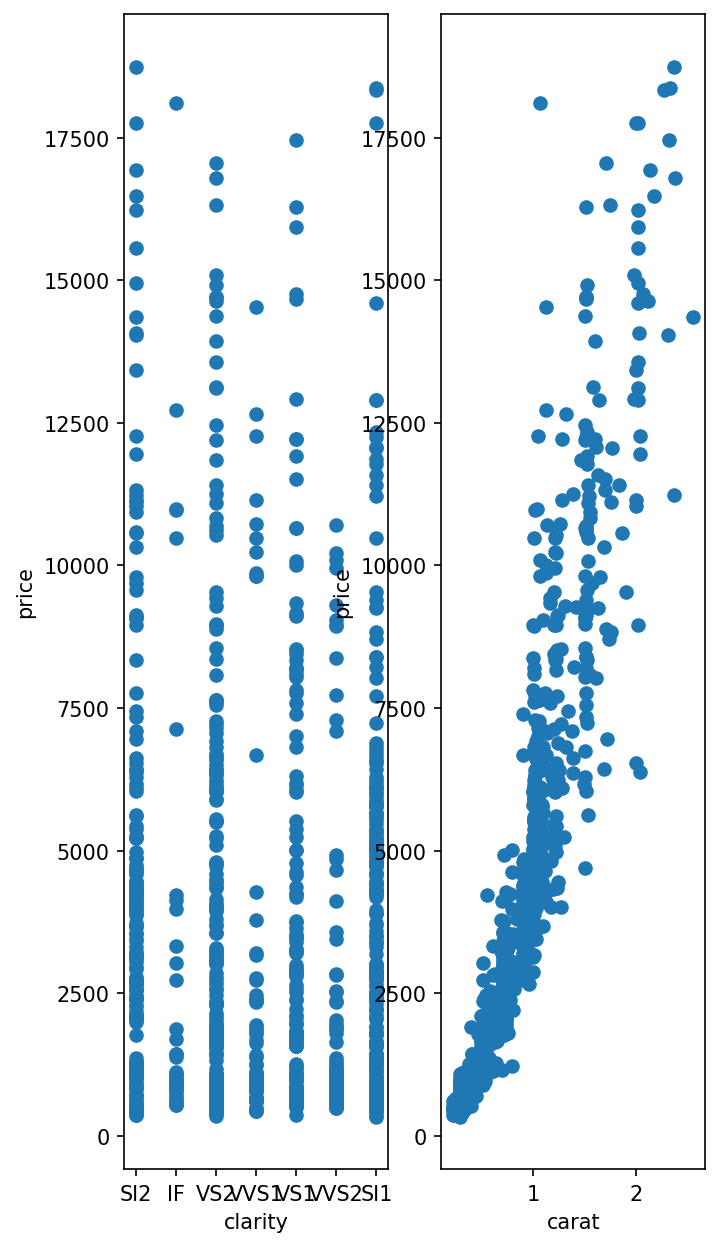

In [27]:
rsm.scatter_plot(fitted)

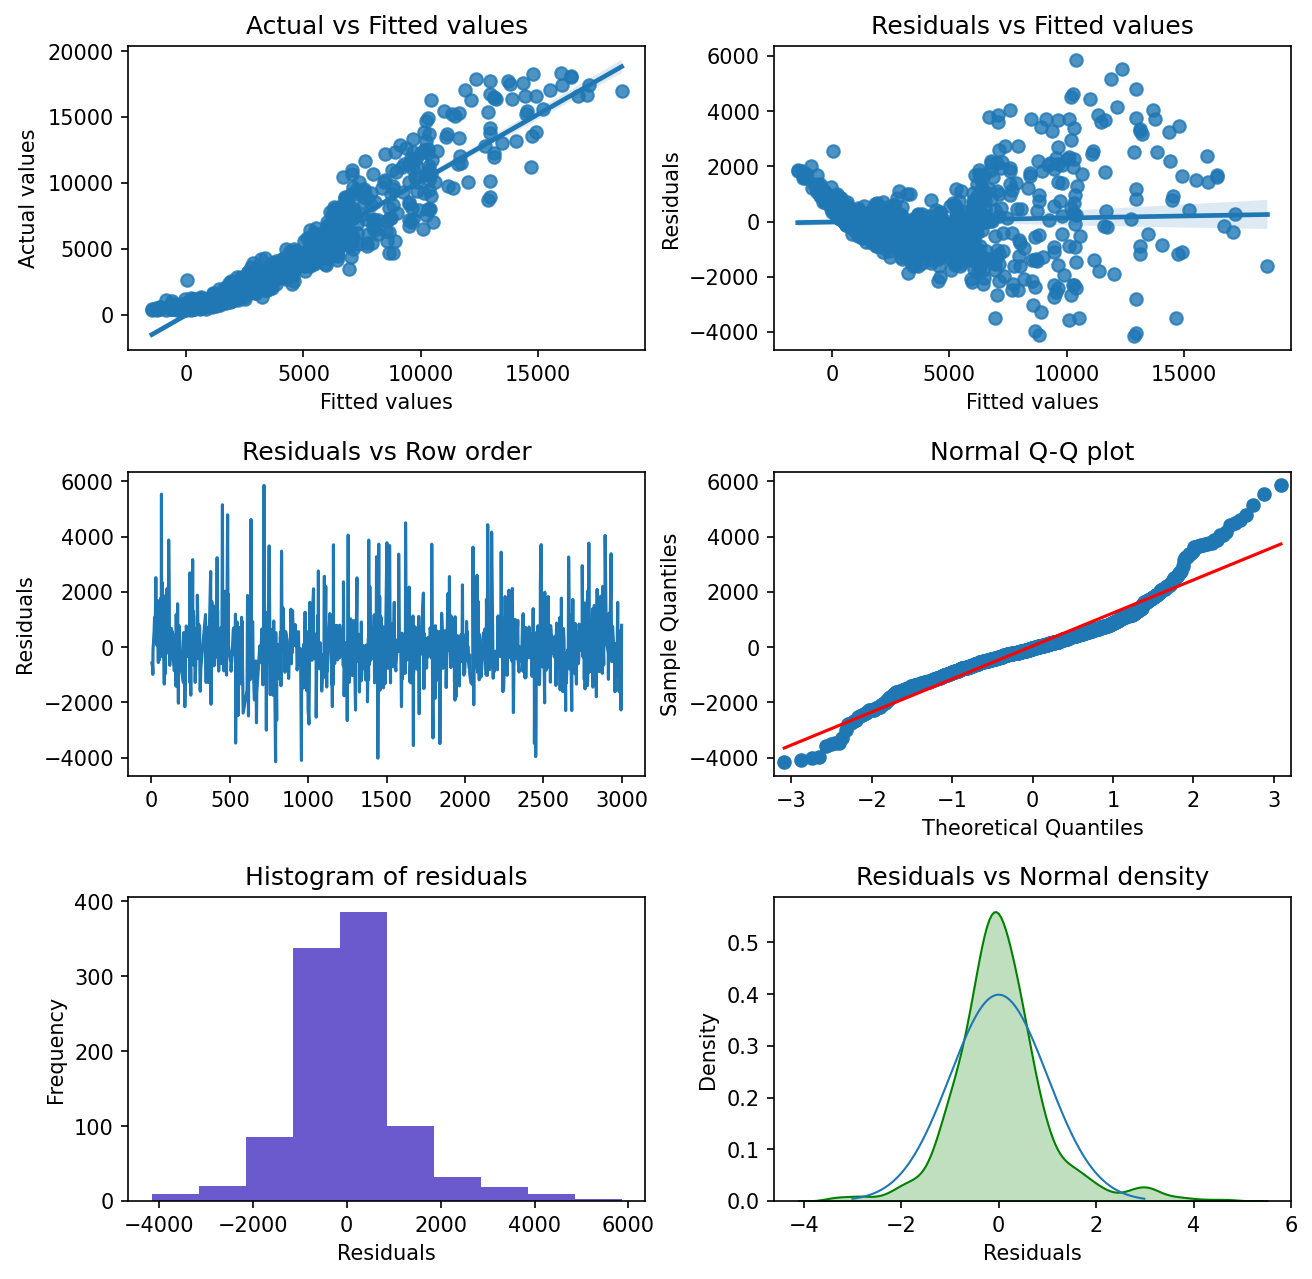

In [28]:
rsm.reg_dashboard(fitted) # not sure why this is different from the one at https://radiant-rstats.github.io/docs/model/regress.html

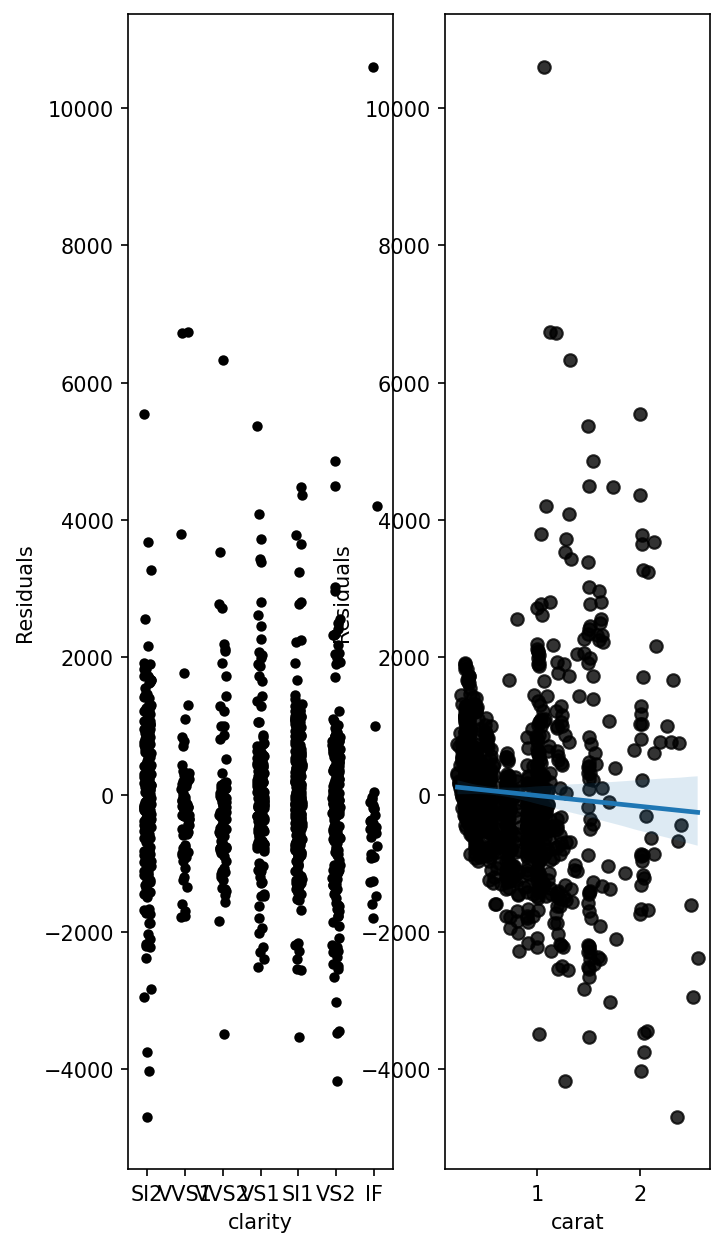

In [29]:
rsm.residual_vs_explanatory_plot(fitted)

In [31]:
diamonds = diamonds.assign(
    price_ln = np.log(diamonds.price),
    carat_ln = np.log(diamonds.carat)
)

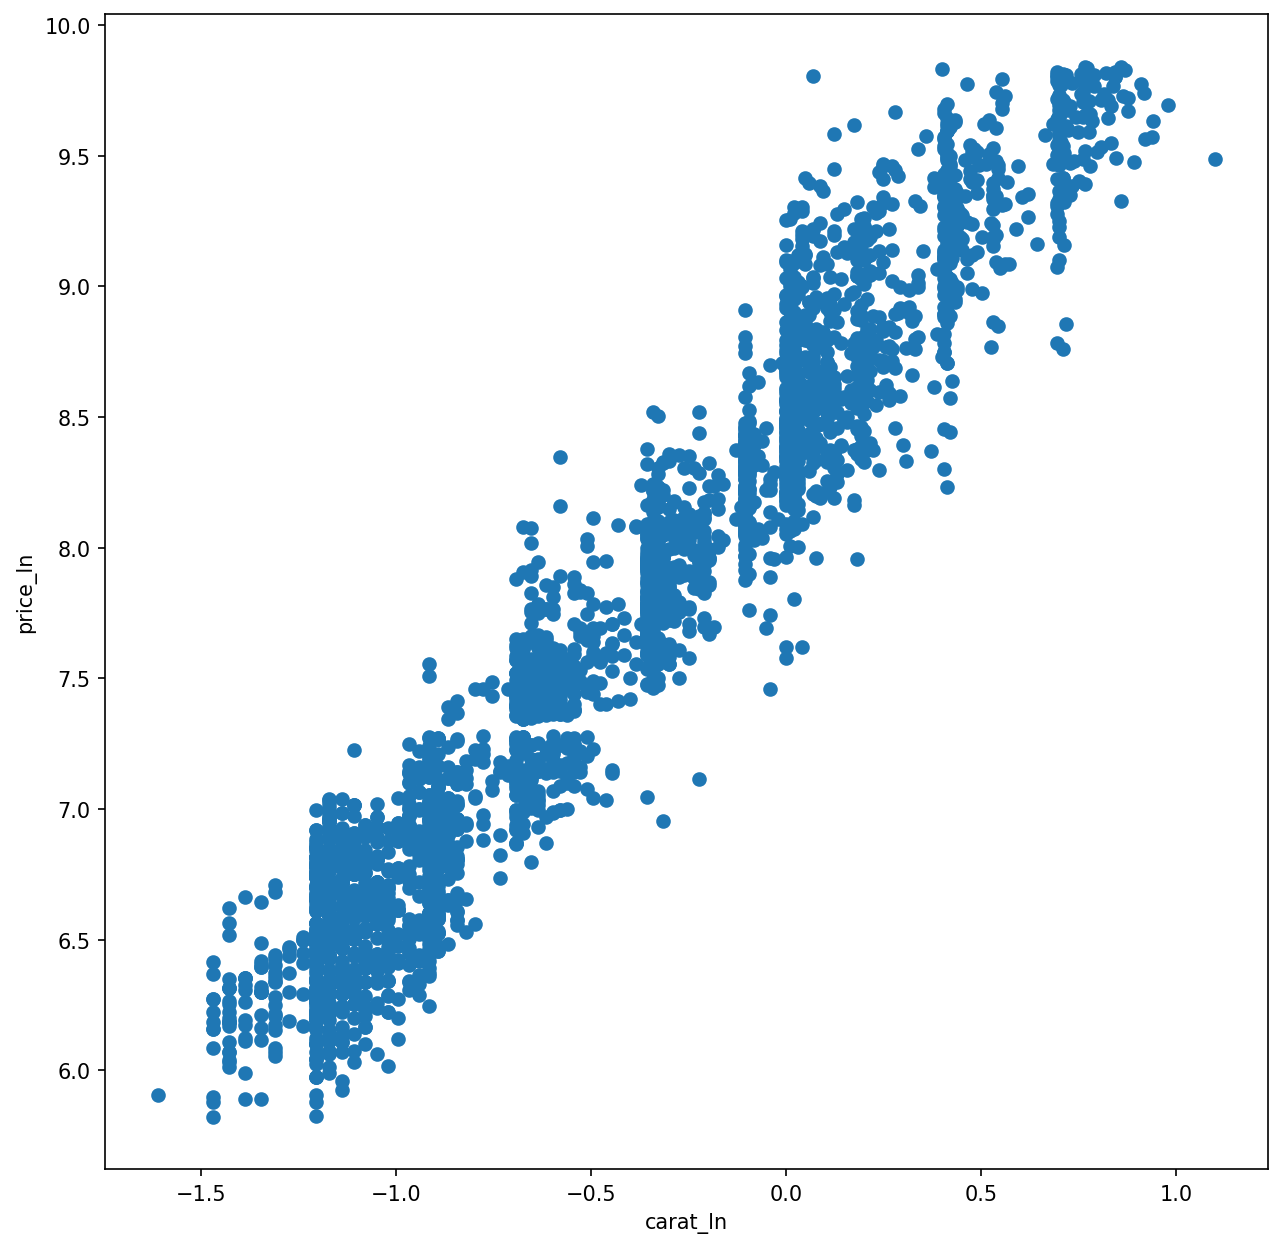

In [32]:
rsm.scatter(diamonds, "carat_ln", "price_ln")

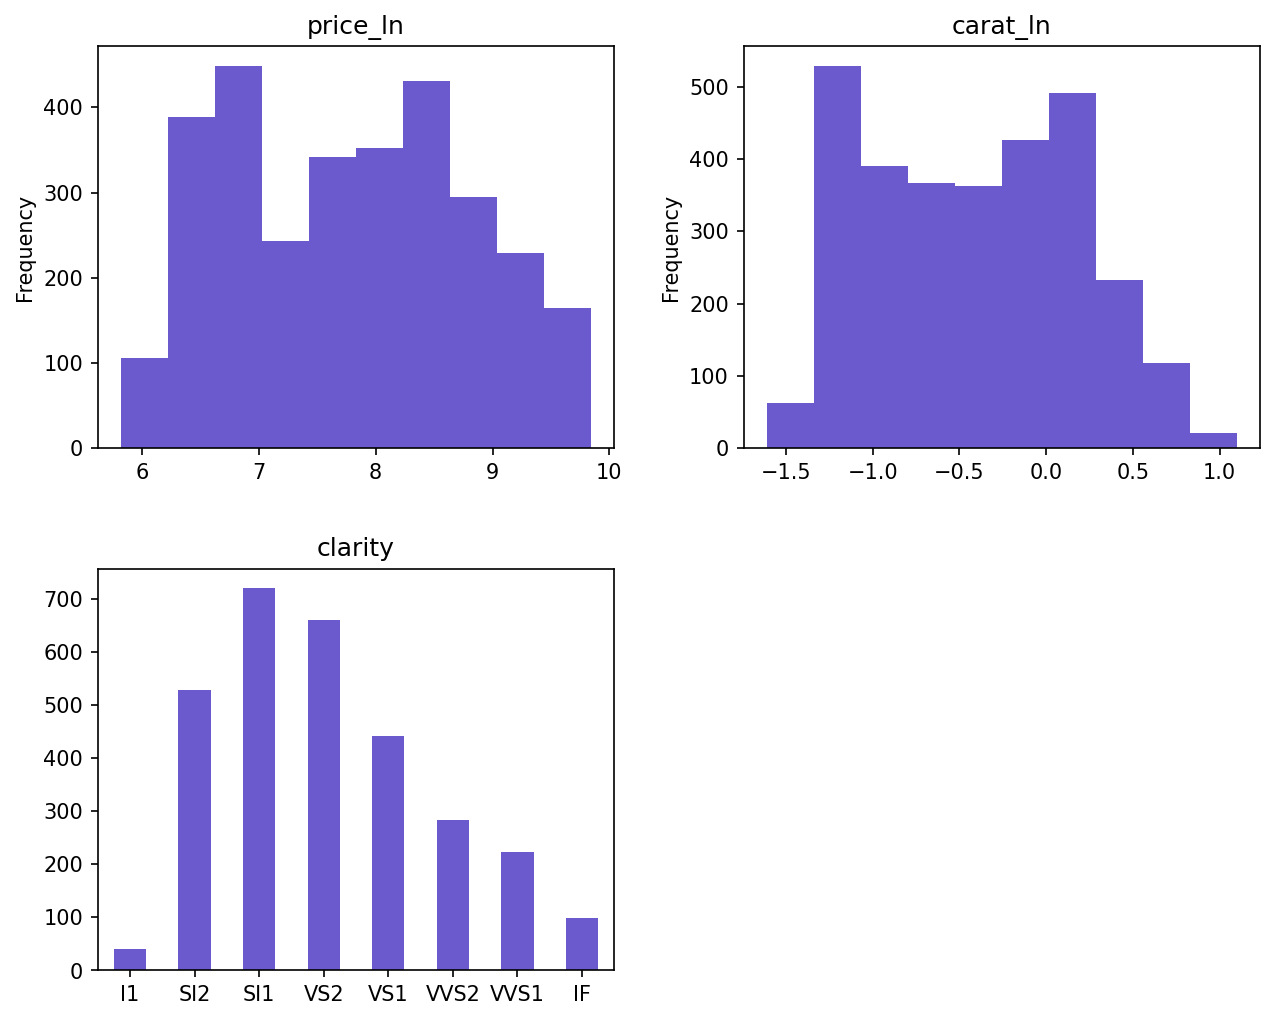

In [33]:
rsm.distr_plot(diamonds, cols=["price_ln", "carat_ln", "clarity"])

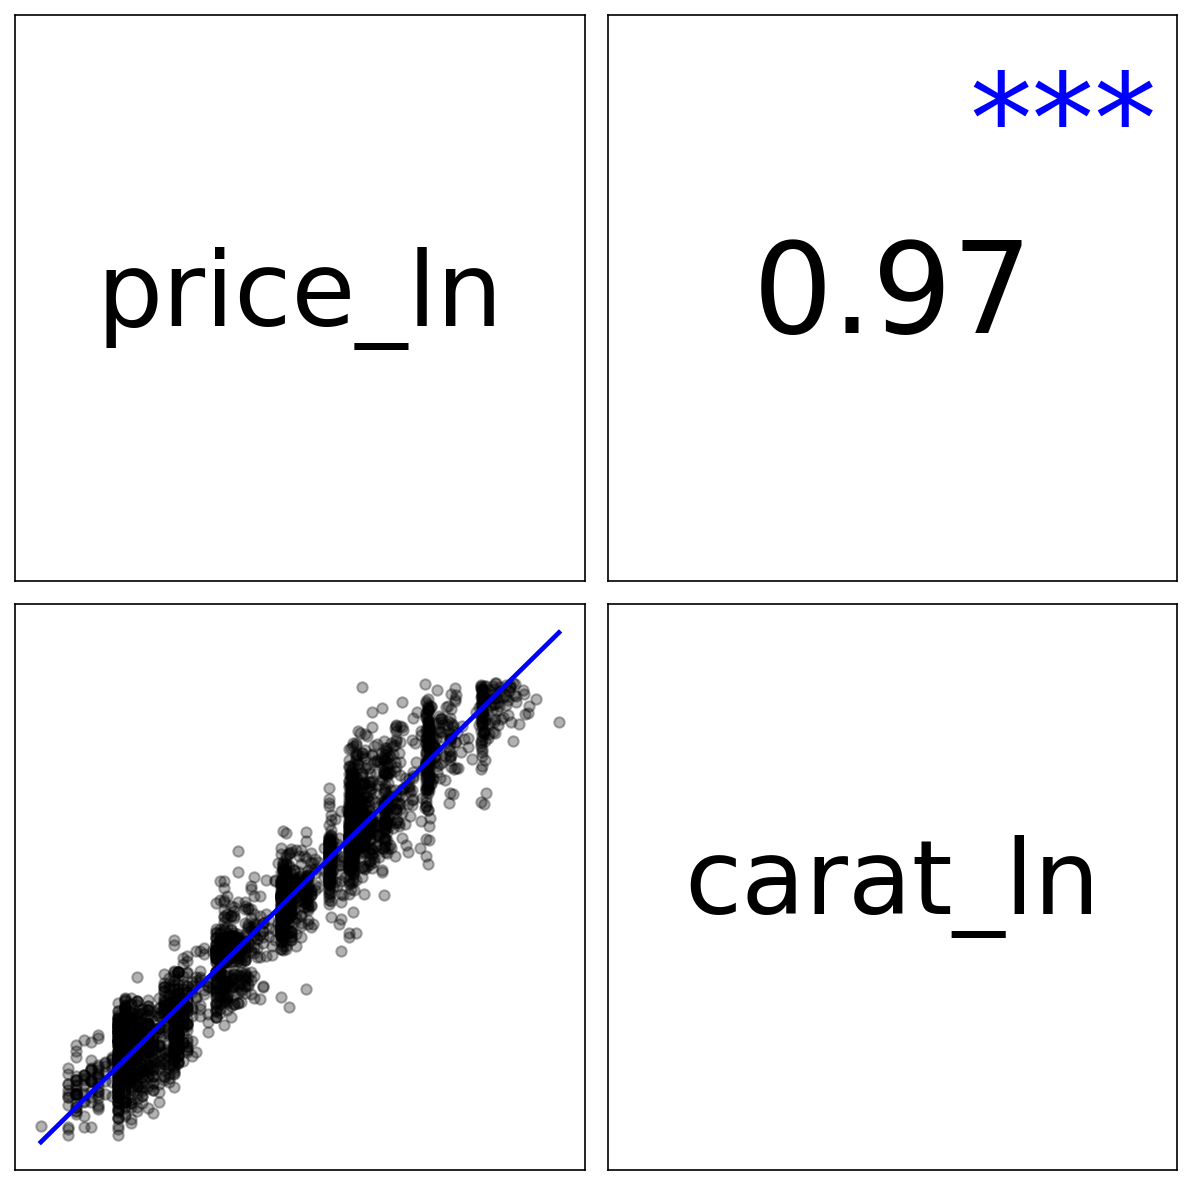

In [34]:
cr = rsm.correlation(diamonds[["price_ln", "carat_ln", "clarity"]])
cr.plot(nobs=-1, figsize=(10, 10))

In [35]:
fitted = rsm.regress(diamonds, rvar="price_ln", evars=["carat_ln", "clarity"])

Data:  
Response variable    : price_ln
Explanatory variables: carat_ln, clarity
Null hyp.: the effect of x on price_ln is zero
Alt. hyp.: the effect of x on price_ln is not zero

                             OLS Regression Results                            
Dep. Variable:               price_ln   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.069e+04
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        00:15:05   Log-Likelihood:                 775.82
No. Observations:                3000   AIC:                            -1534.
Df Residuals:                    2991   BIC:                            -1480.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef   

exog_names: ['Intercept', 'clarity[T.SI2]', 'clarity[T.SI1]', 'clarity[T.VS2]', 'clarity[T.VS1]', 'clarity[T.VVS2]', 'clarity[T.VVS1]', 'clarity[T.IF]', 'carat_ln']

exog_names: ['clarity', 'carat_ln']


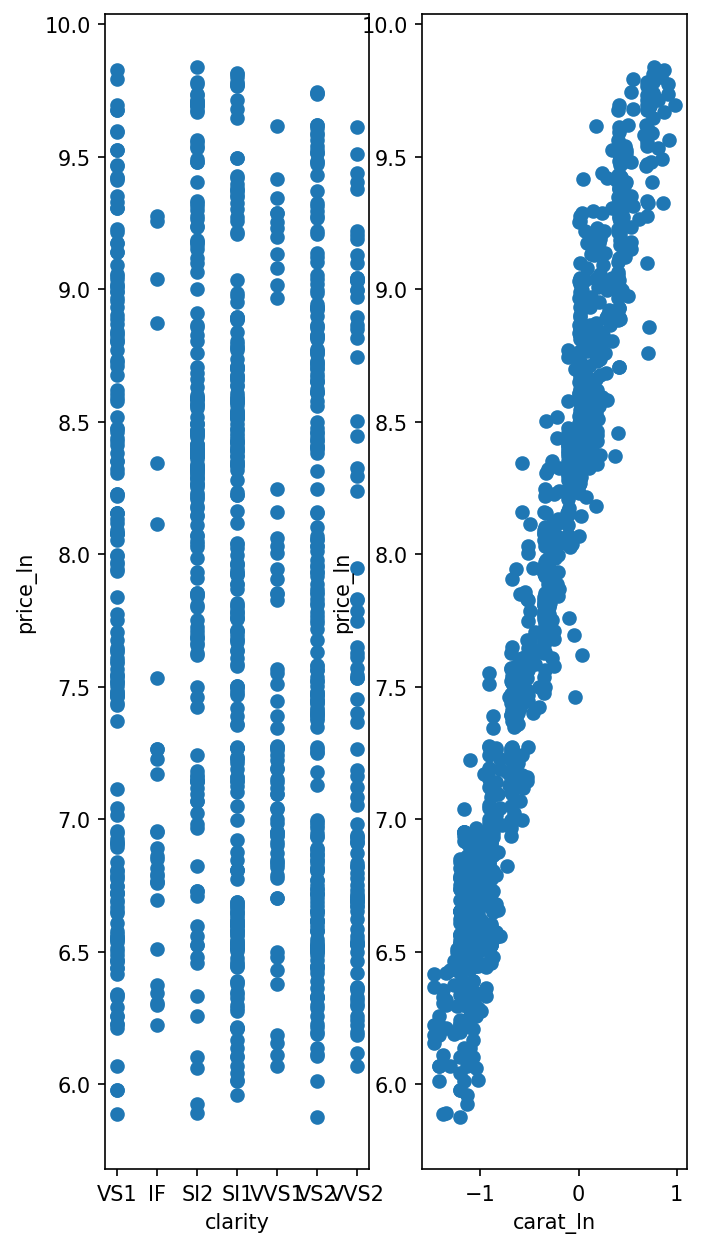

In [36]:
rsm.scatter_plot(fitted)

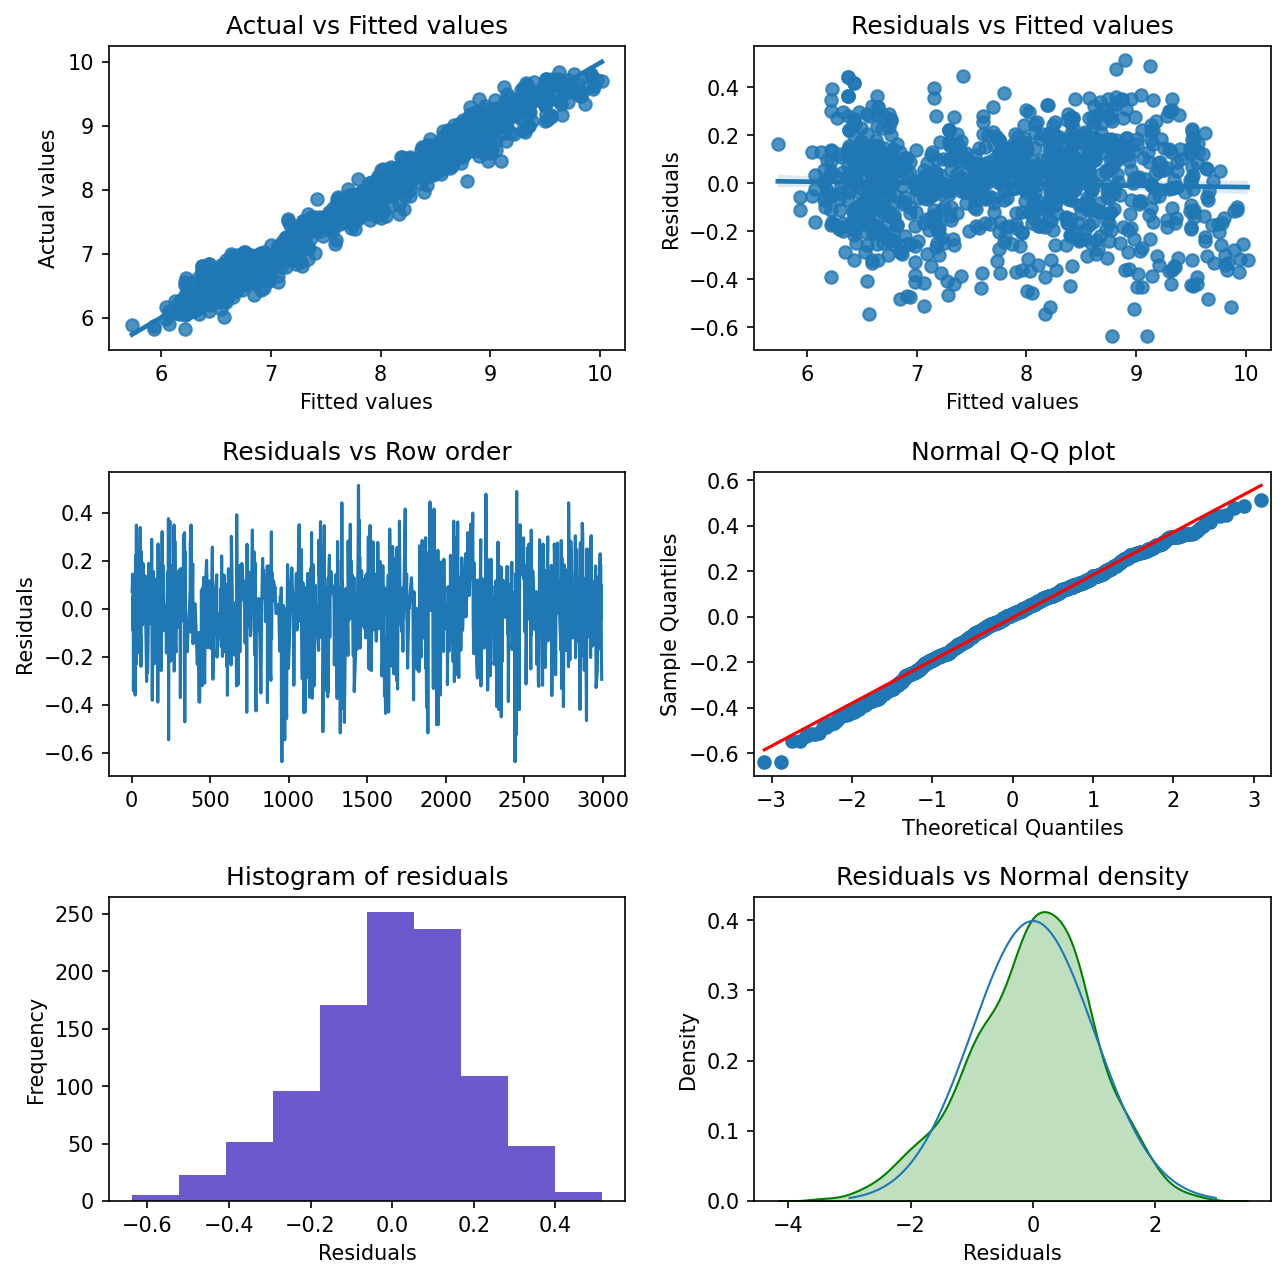

In [37]:
rsm.reg_dashboard(fitted)

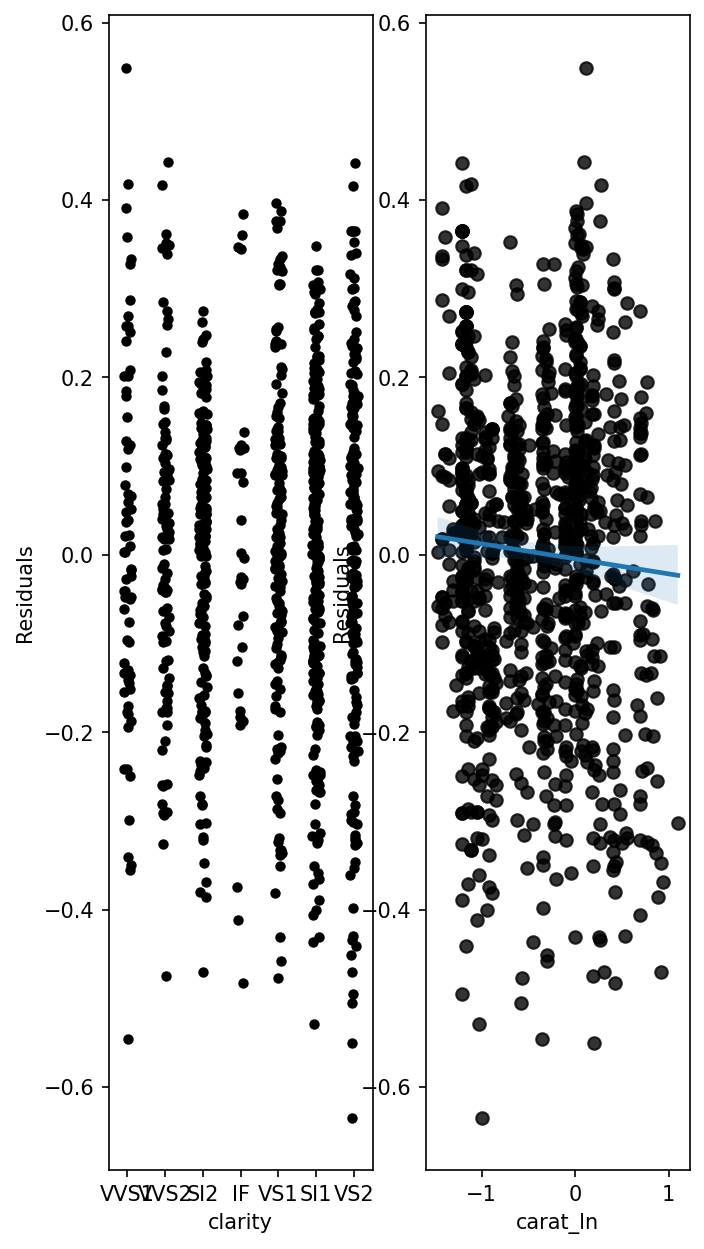

In [38]:
rsm.residual_vs_explanatory_plot(fitted)